In [294]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [295]:

# nombre de lignes à charger en même temps en mémoire
chunksize = 10 ** 4
filename = 'products.csv'
nan_rates = []
for chunk in pd.read_csv(filename, chunksize=chunksize, sep='\t'):
    nan_rates.append(chunk.isna().mean(axis=0))
# moyenne des taux de remplissage des chunks
inds_nan_rate = pd.concat(nan_rates, axis=1).mean(axis=1)
cols_to_load = inds_nan_rate[inds_nan_rate < 0.7].index.tolist()
df = pd.read_csv(filename, sep='\t', usecols=cols_to_load)


/var/folders/25/t6v1433n06x6vfl9wjbxn8sw0000gn/T/ipykernel_49368/1288492662.py:5: DtypeWarning: Columns (0,17,33,35,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(filename, chunksize=chunksize, sep='\t'):
/var/folders/25/t6v1433n06x6vfl9wjbxn8sw0000gn/T/ipykernel_49368/1288492662.py:5: DtypeWarning: Columns (0,17,33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(filename, chunksize=chunksize, sep='\t'):
/var/folders/25/t6v1433n06x6vfl9wjbxn8sw0000gn/T/ipykernel_49368/1288492662.py:5: DtypeWarning: Columns (0,11,17,33,35,72) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(filename, chunksize=chunksize, sep='\t'):
/var/folders/25/t6v1433n06x6vfl9wjbxn8sw0000gn/T/ipykernel_49368/1288492662.py:5: DtypeWarning: Columns (33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_cs

In [296]:
df.info

<bound method DataFrame.info of                           code  \
0            00000000000000225   
1       0000000000000207025004   
2         00000000000003429145   
3         00000000000026772226   
4                0000000000017   
...                        ...   
378228             78742058887   
378229             78742058917   
378230             78742058931   
378231             78742059013   
378232             78742059235   

                                                      url          creator  \
0       http://world-en.openfoodfacts.org/product/0000...   nutrinet-sante   
1       http://world-en.openfoodfacts.org/product/0000...          kiliweb   
2       http://world-en.openfoodfacts.org/product/0000...          kiliweb   
3       http://world-en.openfoodfacts.org/product/0000...          kiliweb   
4       http://world-en.openfoodfacts.org/product/0000...          kiliweb   
...                                                   ...              ...   
378228  http:

In [297]:
df = df.drop(['url','creator','created_datetime','last_modified_t','last_modified_datetime','created_t','last_modified_by','last_updated_t','last_updated_datetime','last_image_t','last_image_datetime','image_url','image_small_url','vitamin-a_100g','calcium_100g','iron_100g','vitamin-c_100g','brands_tags','countries_tags','countries_en','states_tags','states_en','food_groups_tags','food_groups_en','main_category_en','categories_tags','categories_en','additives_tags','additives_en'], axis=1)

In [298]:
df.head(5)

,code,product_name,brands,categories,countries,ingredients_text,ingredients_tags,ingredients_analysis_tags,serving_size,serving_quantity,...,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,nutrition-score-fr_100g
0,00000000000000225,jeunes pousses,endives,"Aliments et boissons à base de végétaux, Alime...",en:france,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000000207025004,Andrè,NaN,NaN,en:de,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,65.0,12.6,3.0,1.5,NaN,NaN,NaN,NaN
2,00000000000003429145,L.casei,NaN,NaN,Spain,"Leche semidesnatada, azucar 6.9%, leche desnat...","en:semi-skimmed-milk,en:dairy,en:milk,en:sugar...","en:palm-oil-free,en:non-vegan,en:vegetarian-st...",NaN,NaN,...,NaN,NaN,9.8,9.8,NaN,2.7,0.10,0.040,0.0,NaN
3,00000000000026772226,Skyr,Danone,"Produits laitiers, Produits fermentés, Dessert...",France,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.9,3.9,NaN,10.0,0.09,0.036,NaN,-5.0
4,0000000000017,Vitória crackers,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,70.1,15.0,NaN,7.8,1.40,0.560,NaN,NaN


In [299]:
df.dtypes

code                                                      object
product_name                                              object
brands                                                    object
categories                                                object
countries                                                 object
ingredients_text                                          object
ingredients_tags                                          object
ingredients_analysis_tags                                 object
serving_size                                              object
serving_quantity                                         float64
additives_n                                              float64
nutriscore_score                                         float64
nutriscore_grade                                          object
nova_group                                               float64
pnns_groups_1                                             object
pnns_groups_2            

In [300]:
for column in df.columns:
    doublons = df[column].duplicated().sum()
    print(f"Column: {column}")
    print(doublons)

Column: code
3
Column: product_name
132425
Column: brands
352503
Column: categories
362903
Column: countries
376297
Column: ingredients_text
224685
Column: ingredients_tags
239660
Column: ingredients_analysis_tags
378195
Column: serving_size
350480
Column: serving_quantity
376898
Column: additives_n
378199
Column: nutriscore_score
378178
Column: nutriscore_grade
378225
Column: nova_group
378228
Column: pnns_groups_1
378221
Column: pnns_groups_2
378192
Column: food_groups
378186
Column: states
376275
Column: brand_owner
370883
Column: ecoscore_grade
378225
Column: nutrient_levels_tags
378013
Column: completeness
378172
Column: main_category
372102
Column: image_nutrition_url
214533
Column: image_nutrition_small_url
214533
Column: energy-kcal_100g
365774
Column: energy_100g
374901
Column: fat_100g
368283
Column: saturated-fat_100g
371238
Column: trans-fat_100g
377650
Column: cholesterol_100g
377046
Column: carbohydrates_100g
363069
Column: sugars_100g
367334
Column: fiber_100g
374402
Col

In [301]:
df = df.drop_duplicates(subset='code')
for column in df.columns:
    doublons = df[column].duplicated().sum()
    print(f"Column: {column}")
    print(doublons)

Column: code
0
Column: product_name
132423
Column: brands
352501
Column: categories
362902
Column: countries
376294
Column: ingredients_text
224682
Column: ingredients_tags
239657
Column: ingredients_analysis_tags
378192
Column: serving_size
350477
Column: serving_quantity
376895
Column: additives_n
378196
Column: nutriscore_score
378175
Column: nutriscore_grade
378222
Column: nova_group
378225
Column: pnns_groups_1
378218
Column: pnns_groups_2
378189
Column: food_groups
378183
Column: states
376273
Column: brand_owner
370880
Column: ecoscore_grade
378222
Column: nutrient_levels_tags
378010
Column: completeness
378170
Column: main_category
372100
Column: image_nutrition_url
214530
Column: image_nutrition_small_url
214530
Column: energy-kcal_100g
365771
Column: energy_100g
374898
Column: fat_100g
368280
Column: saturated-fat_100g
371235
Column: trans-fat_100g
377647
Column: cholesterol_100g
377043
Column: carbohydrates_100g
363066
Column: sugars_100g
367331
Column: fiber_100g
374399
Col

In [302]:
df.isna().any()

code                                                     False
product_name                                              True
brands                                                    True
categories                                                True
countries                                                 True
ingredients_text                                          True
ingredients_tags                                          True
ingredients_analysis_tags                                 True
serving_size                                              True
serving_quantity                                          True
additives_n                                               True
nutriscore_score                                          True
nutriscore_grade                                          True
nova_group                                                True
pnns_groups_1                                             True
pnns_groups_2                                          

In [303]:
df.isna().mean()

code                                                     0.000000
product_name                                             0.022042
brands                                                   0.421963
categories                                               0.445388
countries                                                0.003939
ingredients_text                                         0.461129
ingredients_tags                                         0.461256
ingredients_analysis_tags                                0.452291
serving_size                                             0.460476
serving_quantity                                         0.465608
additives_n                                              0.461129
nutriscore_score                                         0.499474
nutriscore_grade                                         0.001428
nova_group                                               0.488631
pnns_groups_1                                            0.001327
pnns_group

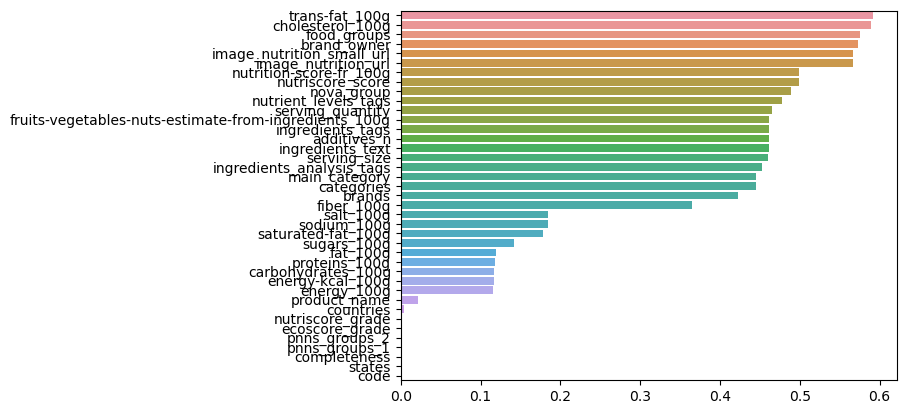

In [304]:
valeurs_manq = df.isna().mean().sort_values(ascending=False)
sns.barplot(x=valeurs_manq.values, y=valeurs_manq.index);

In [305]:
# Taille initiale du DataFrame
initial_size = df.shape[0]

# Liste des colonnes à vérifier
columns_to_check = [
    'fat_100g', 'saturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g',
    'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
    'salt_100g', 'sodium_100g'
]

# Suppression des lignes contenant des valeurs supérieures à 100 dans les colonnes spécifiées
for column in columns_to_check:
    df = df[df[column] <= 100]

# Taille finale du DataFrame
final_size = df.shape[0]

# Nombre de lignes supprimées
num_deleted_rows = initial_size - final_size

print(f"Nombre de lignes supprimées : {num_deleted_rows}")
print("DataFrame après suppression des lignes avec des valeurs supérieures à 100 :")
df.info

Nombre de lignes supprimées : 233827
DataFrame après suppression des lignes avec des valeurs supérieures à 100 :


<bound method DataFrame.info of                  code                    product_name  \
74      0000000004530  Banana Chips Sweetened (Whole)   
75      0000000004559                         Peanuts   
309     0000000033640      Granola Cranberry And Acai   
312     0000000033688             Peanuts, Mixed Nuts   
384     0000000043595                     Cranberries   
...               ...                             ...   
378227    78742058825                  Classic hummus   
378228    78742058887                Banana creme pie   
378229    78742058917                         Muffins   
378230    78742058931                    Iced tea mix   
378231    78742059013                         Muffins   

                             brands  \
74                              NaN   
75                   Torn & Glasser   
309                   Viva La Salud   
312                Northgate Market   
384                  Torn & Glasser   
...                             ...   
378227    